## 概率基本运算

https://zhuanlan.zhihu.com/p/259891358

In [1]:
from itertools import combinations, permutations

### 组合

In [2]:
list(combinations([1,2,3,4,5], 1))

[(1,), (2,), (3,), (4,), (5,)]

In [3]:
list(combinations([1,2,3,4,5], 2))

[(1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (2, 3),
 (2, 4),
 (2, 5),
 (3, 4),
 (3, 5),
 (4, 5)]

In [4]:
list(combinations([1,2,3,4,5], 3))

[(1, 2, 3),
 (1, 2, 4),
 (1, 2, 5),
 (1, 3, 4),
 (1, 3, 5),
 (1, 4, 5),
 (2, 3, 4),
 (2, 3, 5),
 (2, 4, 5),
 (3, 4, 5)]

In [5]:
list(combinations([1,2,3,4,5], 4))

[(1, 2, 3, 4), (1, 2, 3, 5), (1, 2, 4, 5), (1, 3, 4, 5), (2, 3, 4, 5)]

In [6]:
list(combinations([1,2,3,4,5], 5))

[(1, 2, 3, 4, 5)]

### 排列

In [7]:
list(permutations([1,2,3]))

[(1, 2, 3), (1, 3, 2), (2, 1, 3), (2, 3, 1), (3, 1, 2), (3, 2, 1)]

In [8]:
a = set([1,2,3,4])
b = set([3,4,5,6])

### 并集

In [9]:
a.union(b)

{1, 2, 3, 4, 5, 6}

### 交集

In [10]:
a.intersection(b)

{3, 4}

### 差集

In [11]:
a.difference(b)

{1, 2}

In [12]:
b.difference(a)

{5, 6}

### 伯努利分布

伯努利试验是在相互独立的条件下随机的实验，结果只有两种：成功/不成功，例如抛硬币实验。如果这个随机变量是伯努利实验，那么它就服从伯努利分布 ，亦称“0-1分布”

In [13]:
import numpy as np
import matplotlib. pyplot as plt
from scipy import stats

arange 用于生成-一个等差数组，arange([start, ]stop, [step, ]

第1步，定义随机变量: 1次拋硬币
成功指正面朝上记录为1,失败指反面朝上记录为0

In [14]:
x=np.arange(0, 2, 1)
x

array([0, 1])

第2步，求对应分布的概率：概率质量函数(PMF)

它返回一个列表，列表中每个元资表示随机变量中对应值的概事

In [15]:
p=0.5
#硬币朝上的概笋
plist=stats.bernoulli.pmf(x, p)
plist 

array([0.5, 0.5])

第 3 步， 画图

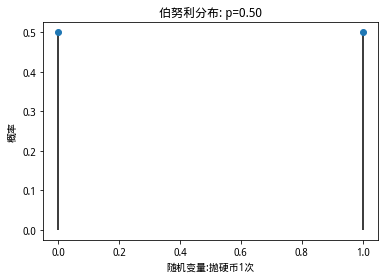

In [16]:
plt.plot(x, plist, marker='o', linestyle='None')
plt.vlines (x, 0, plist)
plt.xlabel('随机变量:拋硬币1次')
plt.ylabel('概率')
plt.title('伯努利分布: p=%.2f' % p)
plt.show()

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Bernouli')]

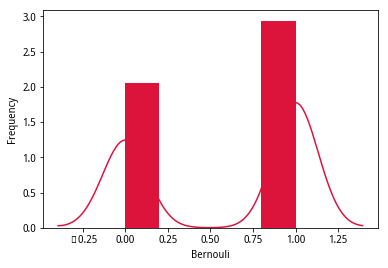

In [17]:
from scipy.stats import bernoulli
import seaborn as sb

data_bern = bernoulli.rvs(size=1000,p=0.6)
ax = sb.distplot(data_bern,
                  kde=True,
                  color='crimson',
                  hist_kws={"linewidth": 25,'alpha':1})
ax.set(xlabel='Bernouli', ylabel='Frequency')

### 二项分布（Binomial Distribution）

定义随的变量: 5次抛频币，正面朝上的改数

In [48]:
n=5 #做某件事情的次数
p =0.5 #做某件事情成功的概率
x=np.arange(0, n+1, 1)
x

array([0, 1, 2, 3, 4, 5])

In [49]:
plist=stats.binom.pmf(x, n, p)
plist

array([0., 0., 0., 0., 0., 0.])

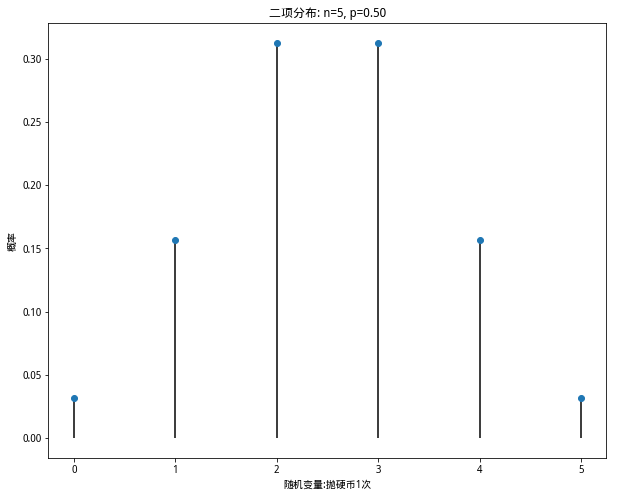

In [50]:
plt.plot(x, plist, marker='o', linestyle='None')
plt.vlines (x, 0, plist)
plt.xlabel('随机变量:拋硬币1次')
plt.ylabel('概率')
plt.title('二项分布: n=%d, p=%.2f' % (n,p))
plt.show()

50.0 25.0 0.0 -0.02


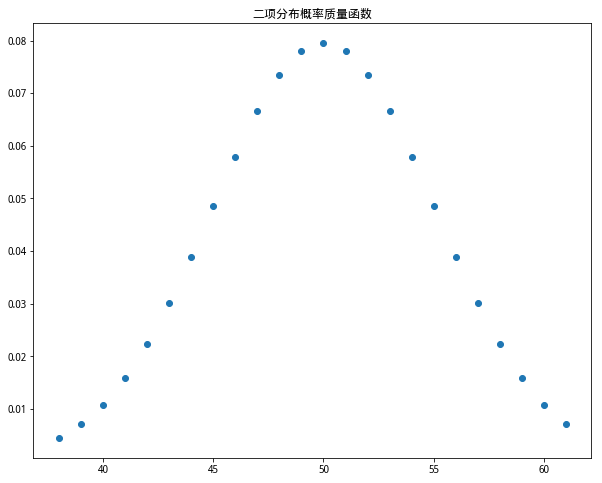

In [52]:
fig,ax = plt.subplots(1,1)
n = 100
p = 0.5
#平均值, 方差, 偏度, 峰度
mean,var,skew,kurt=stats.binom.stats(n,p,moments='mvsk')
print(mean,var,skew,kurt)
#ppf:累积分布函数的反函数。q=0.01时，ppf就是p(X<x)=0.01时的x值。
x=np.arange(stats.binom.ppf(0.01,n,p),stats.binom.ppf(0.99,n,p))
ax.plot(x,stats.binom.pmf(x,n,p),'o')
plt.rcParams['font.sans-serif']=['SimHei']
plt.title('二项分布概率质量函数')
plt.show()

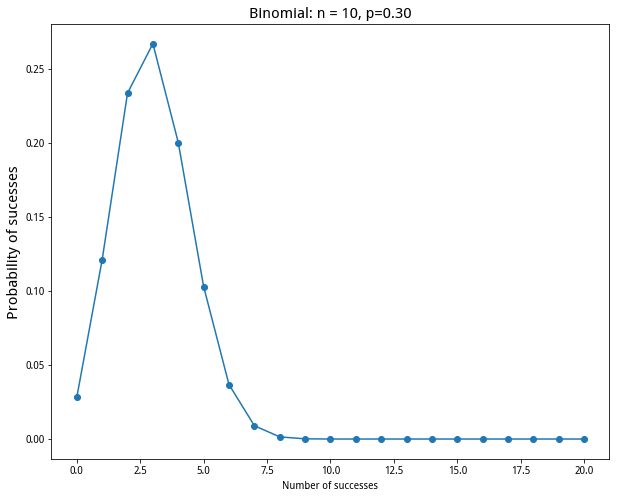

In [53]:
#次数
n = 10
#概率
p = 0.3
#导入特征系数
k = np.arange(0, 21)
#伯努利分布的特征值导入
binomial = stats.binom.pmf(k, n, p)
plt.plot(k, binomial, 'o-')
plt.title('Binomial: n = %i, p=%0.2f' % (n, p), fontsize=15)
plt.xlabel('Number of successes')
plt.ylabel('Probability of sucesses', fontsize=15)
plt.show()

### 几何分布（Geometric Distribution）

在n次伯努利试验中，试验k次才得到第一次成功的机率。也就是说：前k-1次皆失败，第k次成功的概率。

首次表白成功的次数，可能是1次，2次，3次等

第 k 次做某件事情，才取到第1次成功，这里我们想知道5次表白成功的概率


In [23]:
k=5
p=0.6 #做某件事情成功的概率，这里假设每次表白成功概事都是60%
x=np.arange(1,n+1,1) 

In [24]:
plist=stats.geom.pmf(x, p)
plist

array([0.6, 0.24, 0.09600000000000002, 0.03840000000000001,
       0.015360000000000002, 0.006144000000000001, 0.0024576000000000008,
       0.0009830400000000003, 0.0003932160000000002,
       0.00015728640000000008])

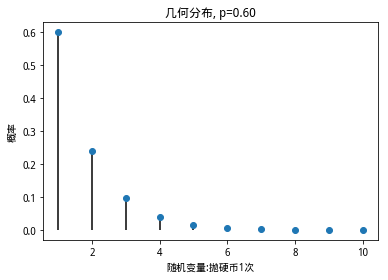

In [25]:
plt.plot(x, plist, marker='o', linestyle='None')
plt.vlines (x, 0, plist)
plt.xlabel('随机变量:拋硬币1次')
plt.ylabel('概率')
plt.title('几何分布, p=%.2f' % (p))
plt.show()

### 泊松分布（Poisson Distribution）

泊松分布的参数λ是单位时间(或单位面积)内随机事件的平均发生次数。 泊松分布适合于描述单位时间内随机事件发生的次数。 比如：在一定时间内某交通路口所发生的事故个数

已知某路口发生事故的比率是每天 2 次，
那么在此处一天内发生 k 次事故的概率是多少?

In [26]:
mu=2 #平均值:每天发生2次事越
k=4 #次数，现在想知道每天发生4次事越的概率
x=np.arange (0,k+1,1) #包含了发生0次，1次，2次，3次，4次事故
x

array([0, 1, 2, 3, 4])

In [27]:
plist=stats.poisson.pmf(x, mu)
plist

array([0.1353352832366127, 0.2706705664732254, 0.2706705664732254,
       0.18044704431548356, 0.09022352215774178])

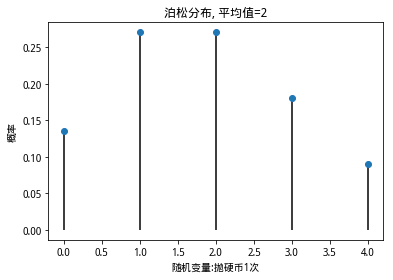

In [28]:
plt.plot(x, plist, marker='o', linestyle='None')
plt.vlines (x, 0, plist)
plt.xlabel('随机变量:拋硬币1次')
plt.ylabel('概率')
plt.title('泊松分布, 平均值=%i' % (mu))
plt.show()

### 正态分布（The Normal Distribution)

正态分布也被称为高斯分布或钟形曲线，这是统计学中最重要的概率分布 。这是一个对称分布，其中大多数观测值聚集在具有最高发生概率的中心峰平均值μ附近，并且当观测值在两个方向上都偏离中心峰时，曲线尾部出现值的可能性越来越小

In [29]:
mu=0 # 平均值
sigma=1 # 标准差
x=np.arange(-5,5,0.1)
x

array([-5.0, -4.9, -4.800000000000001, -4.700000000000001,
       -4.600000000000001, -4.500000000000002, -4.400000000000002,
       -4.3000000000000025, -4.200000000000003, -4.100000000000003,
       -4.0000000000000036, -3.900000000000004, -3.8000000000000043,
       -3.7000000000000046, -3.600000000000005, -3.5000000000000053,
       -3.4000000000000057, -3.300000000000006, -3.2000000000000064,
       -3.1000000000000068, -3.000000000000007, -2.9000000000000075,
       -2.800000000000008, -2.700000000000008, -2.6000000000000085,
       -2.500000000000009, -2.4000000000000092, -2.3000000000000096,
       -2.20000000000001, -2.1000000000000103, -2.0000000000000107,
       -1.900000000000011, -1.8000000000000114, -1.7000000000000117,
       -1.600000000000012, -1.5000000000000124, -1.4000000000000128,
       -1.3000000000000131, -1.2000000000000135, -1.1000000000000139,
       -1.0000000000000142, -0.9000000000000146, -0.8000000000000149,
       -0.7000000000000153, -0.6000000000000156

In [30]:
y=stats.norm.pdf(x,mu,sigma)
y

array([1.4867195147342979e-06, 2.438960745893352e-06,
       3.961299091032062e-06, 6.369825178867069e-06,
       1.014085206548667e-05, 1.5983741106905332e-05,
       2.4942471290053356e-05, 3.853519674208672e-05,
       5.8943067756539116e-05, 8.926165717713167e-05,
       0.00013383022576488347, 0.00019865547139276957,
       0.00029194692579145534, 0.0004247802705507443,
       0.0006119019301137612, 0.0008726826950457439,
       0.0012322191684729959, 0.0017225689390536463,
       0.0023840882014647936, 0.0032668190561998523, 0.004431848411937913,
       0.005952532419775727, 0.007915451582979793, 0.010420934814422364,
       0.013582969233685318, 0.017528300493568152, 0.022394530294842407,
       0.028327037741600544, 0.03547459284623067, 0.043983595980426234,
       0.05399096651318691, 0.06561581477467522, 0.07895015830089255,
       0.09404907737688507, 0.11092083467945342, 0.12951759566588933,
       0.1497274656357422, 0.17136859204780444, 0.19418605498320982,
       0.21785

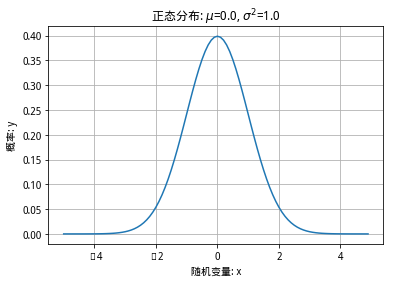

In [31]:
plt.plot(x, y)
plt.xlabel('随机变量: x')
plt.ylabel('概率: y')
plt.title('正态分布: $\mu$=%.1f, $\sigma^2$=%.1f' % (mu, sigma)) 
plt.grid()
plt.show()

### 总体和样本

总体：包含所研究的全部个体（数据）的集合。

样本：研究中实际观测或调查的一部分个体称为样本，从总体中选取

样本数量：有多少个样本

样本容量：每个样本中有多少数据

抽样分布：将样本的平均值分布可视化

In [32]:
import random
a = random.randint(0,9)
a

4

In [33]:
'''
抽奖:生成多个随机数
应用案例:从395个用户中随机抽取10个人作为中奖者
'''
for i in range(10) :
    userid = random.randint(0, 395)
    print('第%s位获奖用户id是%s' % (i, userid))


第0位获奖用户id是378
第1位获奖用户id是326
第2位获奖用户id是61
第3位获奖用户id是232
第4位获奖用户id是81
第5位获奖用户id是223
第6位获奖用户id是73
第7位获奖用户id是48
第8位获奖用户id是381
第9位获奖用户id是260


### 中心极限定理

中心极限定理的准定义是：中心极限定理（CLT）指出，如果样本量足够大，则变量均值的采样分布将近似于正态分布，而与该变量在总体中的分布无关

用处：

(1)在没有办法得到总体全部数据的情况下，我们可以用样本来估计总体

中心极限定理告诉我们，一个正确抽取的样本不会与其所代表的群体产生较大差异。也就是说，样本结果能够很好地体现整个群体的情况 统计概率中假设检验的原理

(2)根据总体的平均值和标准差，判断某个样本是否属于总体:

通过中心极限定理的正态分布，我们就能计算出某个样本属于总体的概率是多少。如果概率非常低，那么我们就能自信满满地说该样本不属于该群体

https://blog.csdn.net/lilongsy/article/details/87355304

中心极限定理指的是给定一个任意分布的总体。我每次从这些总体中随机抽取 n 个抽样，一共抽 m 次。 然后把这 m 组抽样分别求出平均值。 这些平均值的分布接近正态分布。

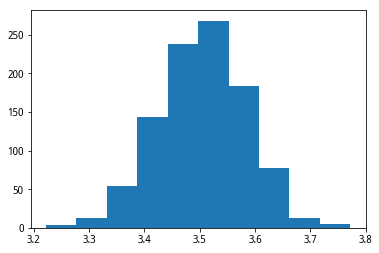

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties


# 设置精度，只留一个小数位
np.set_printoptions(precision=0)

# 生成1-6的随机数
random_data = np.random.randint(1, 7, 1000000)

# 分n组，每组m个
samples = []
# 分组的平均值
samples_mean = []
# 分组的标准差
samples_std = []
for i in range(0, 1000):
    sample = []
    for j in range(0, 500):
        sample.append(random_data[int(np.random.random() * len(random_data))])
    sample_np = np.array(sample)
    samples_mean.append(sample_np.mean())
    samples_std.append(sample_np.std())
    samples.append(sample_np)

# 转换下格式
samples_mean_np = np.array(samples_mean)
samples_std_np = np.array(samples_std)

# 画图
plt.hist(samples_mean_np, bins=10)
plt.show()


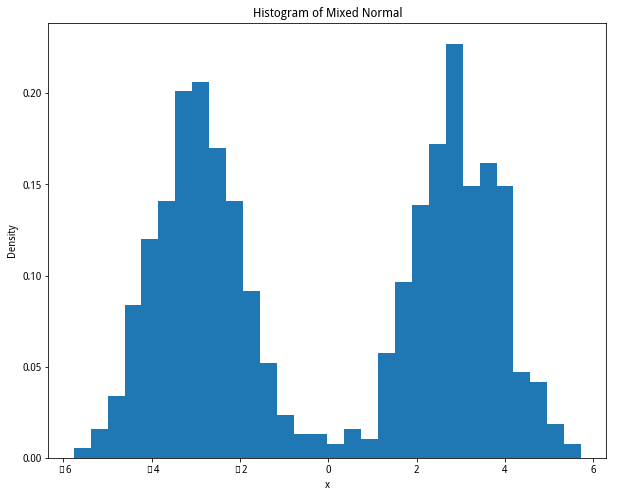

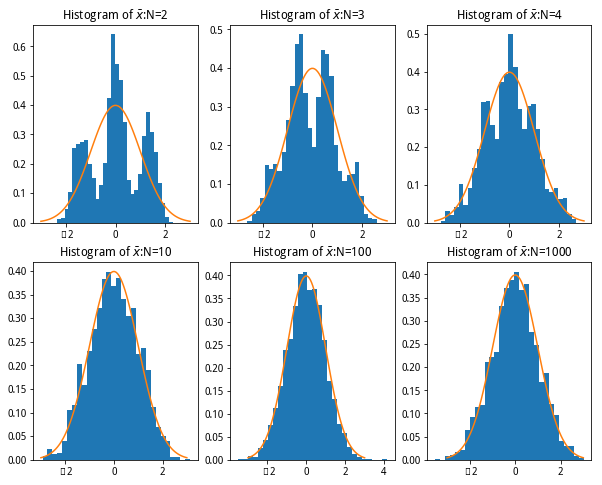

In [35]:
import numpy as np
from numpy import random as nprd

def sampling(N):
    ## 产生一组样本，以0.5的概率为z+3，0.5的概率为z-3，其中z~N(0,1)
    d=nprd.rand(N)<0.5
    z=nprd.randn(N)
    x=np.array([z[i]+3 if d[i] else z[i]-3 for i in range(N)])
    return x

N=[2,3,4,10,100,1000] # sample size
M=2000
MEANS=[]
for n in N:
    mean_x=np.zeros(M)
    for i in range(M):
        x=sampling(n)
        mean_x[i]=np.mean(x)/np.sqrt(10/n) ## 标准化，因为var(x)=10
    MEANS.append(mean_x)

## 导入matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
## 使图形直接插入到jupyter中
# %matplotlib inline
# 设定图像大小
plt.rcParams['figure.figsize'] = (10.0, 8.0)

x=sampling(1000)
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Histogram of Mixed Normal')
plt.hist(x,bins=30,density=1) ## histgram
plt.show() ## 画图

## 均值
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,3,4)
ax5 = plt.subplot(2,3,5)
ax6 = plt.subplot(2,3,6)

## normal density
x=np.linspace(-3,3,100)
d=[1.0/np.sqrt(2*np.pi)*np.exp(-i**2/2) for i in x]

def plot_density(ax,data,N):
    ax.hist(data,bins=30,density=1) ## histgram
    ax.plot(x,d)
    ax.set_title(r'Histogram of $\bar{x}$:N=%d' % N)

plot_density(ax1,MEANS[0],N[0])
plot_density(ax2,MEANS[1],N[1])
plot_density(ax3,MEANS[2],N[2])
plot_density(ax4,MEANS[3],N[3])
plot_density(ax5,MEANS[4],N[4])
plot_density(ax6,MEANS[5],N[5])

plt.show() ## 画图

https://zhuanlan.zhihu.com/p/394395551

数定律又称大数法则、大数律，是描述相当多次数重复实验的结果的定律。根据这个定律知道，样本数量越多，则其算术平均值就有越高的概率接近期望值。

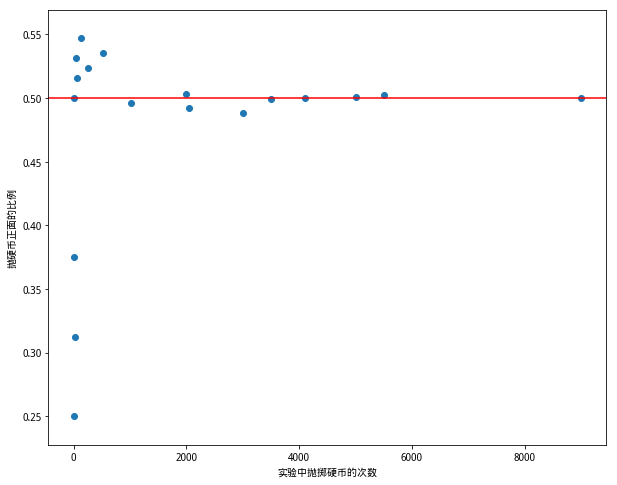

In [36]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns


# 每次实验翻转硬币次数
ns = np.array([2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2000,2048, 3000,3500,4096,5000,5500,9000]) 
# 使用二项式函数来模拟一枚均匀的硬币,计算每次实验出现为正面的次数
heads_count = [np.random.binomial(n, 0.5) for n in ns]
# 计算硬币翻转为正面的占比
proportion_heads = heads_count/ns

fig, ax = plt.subplots()
plt.xlabel('实验中抛掷硬币的次数')
plt.ylabel('抛硬币正面的比例')
plt.axhline(0.5, color='r')
_ = ax.scatter(ns, proportion_heads)

从上图不难发现，当掷硬币的次数越多，翻转得到为正面的数量，越接近掷的总次数的一半，也就是越接近一枚均匀硬币的期望值0.5。

中心极限定理指出，从总体中，具有放回的抽取足够多的随机样本，则样本均值的分布将近似为正态分布（单方面实验测试过，如果不放回的随机抽样，样本均值分布也是近似正态分布）。只要样本量足够大（通常 n>=30）,无论总体分布的初始形状如何，抽样分布都将近似于正态分布。如果总体是正态的，那么该定理即使对于 n<30 的样本也成立。

(-1.5, 1.5)

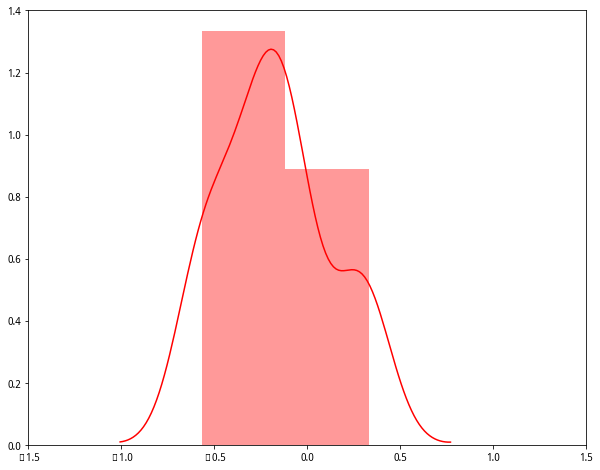

In [37]:
# 随机生成均值为0,标准差为1的标准正态分布
x = np.random.normal(size=10000)

# replace=True 代表有放回
# sample_size 指的是单个样本的大小，n_samples指的是样本数量
def sample_mean_calculator(input_dist, sample_size, n_samples):
    sample_means = []
    for i in range(n_samples):
        sample = np.random.choice(input_dist, size=sample_size, replace=True)
        sample_means.append(sample.mean())
    return sample_means
# 随机抽取10个样本，每个样本大小为10
sns.distplot(sample_mean_calculator(x, 10, 10), color='r')
plt.xlim(-1.5, 1.5)

(-1.5, 1.5)

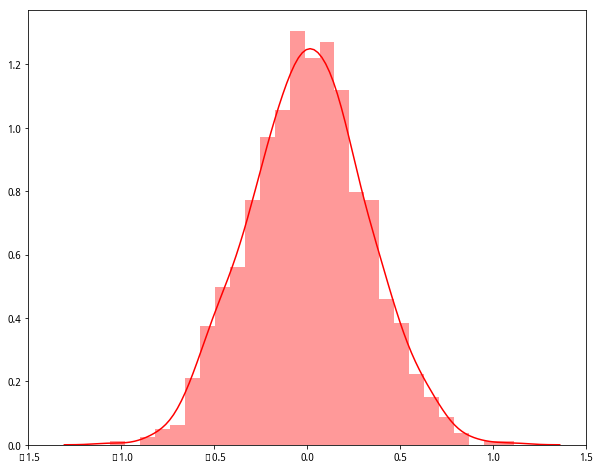

In [38]:
# 随机抽取1000个样本，每个样本大小为10
sns.distplot(sample_mean_calculator(x, 10, 1000), color='r', kde=True)
plt.xlim(-1.5, 1.5)

(-1.5, 1.5)

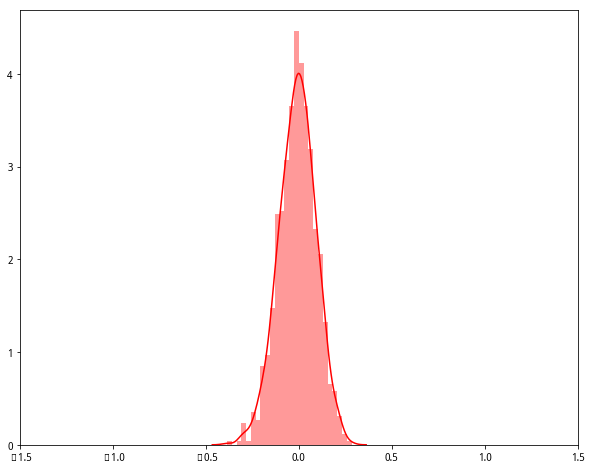

In [39]:
# 随机抽取1000个样本，每个样本大小为100
sns.distplot(sample_mean_calculator(x, 100, 1000), color='r', kde=True)
plt.xlim(-1.5, 1.5)

(-1.5, 1.5)

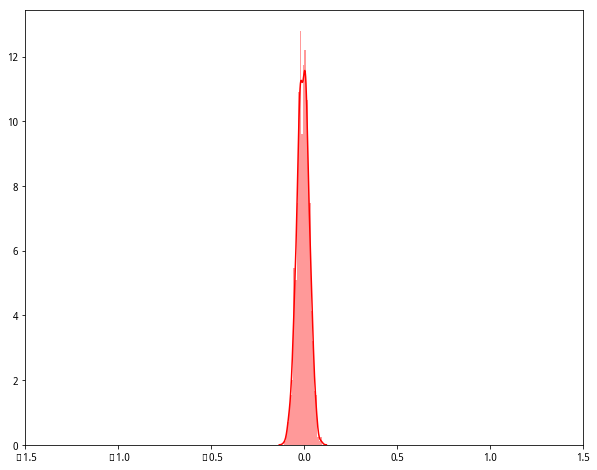

In [40]:
# 随机抽取1000个样本，每个样本大小为1000
sns.distplot(sample_mean_calculator(x, 1000, 1000), color='r', kde=True)
plt.xlim(-1.5, 1.5)

从上面的结果可观察到样本均值的分布是在向总体均值0靠近

接下来看下其他分布的，随机抽样的样本均值分布：

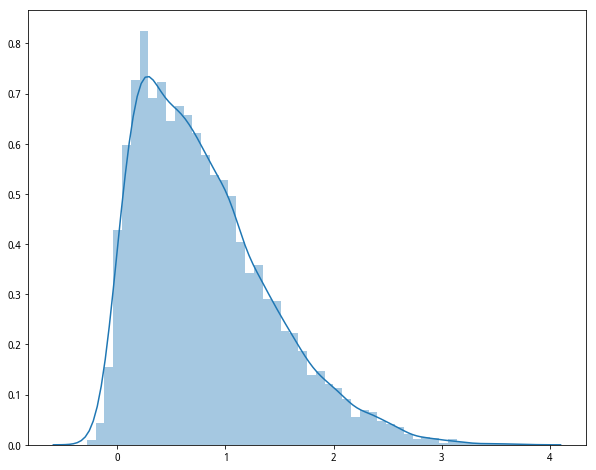

In [41]:
s = st.skewnorm.rvs(10, size=10000)
sns.distplot(s, kde=True)

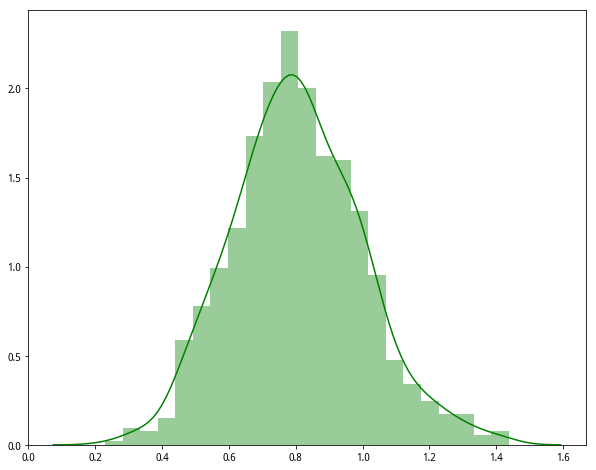

In [42]:
sns.distplot(sample_mean_calculator(s, 10, 1000), color='green', kde=True)

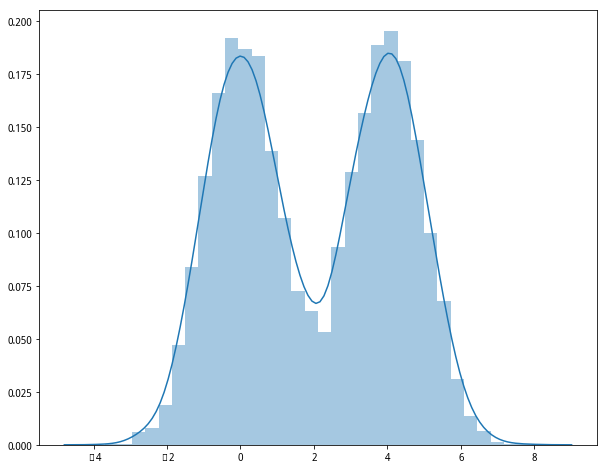

In [43]:
m = np.concatenate((np.random.normal(size=5000), np.random.normal(loc = 4.0, size=5000)))
sns.distplot(m, kde=True)

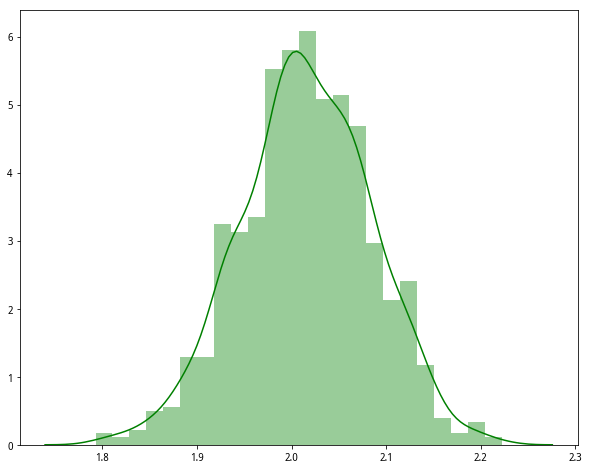

In [44]:
_ = sns.distplot(sample_mean_calculator(m, 1000, 1000), color='green', kde=True)

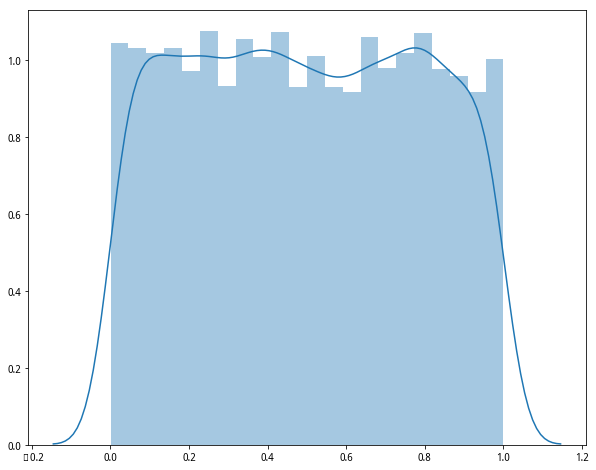

In [45]:
u = np.random.uniform(size=10000)
sns.distplot(u)

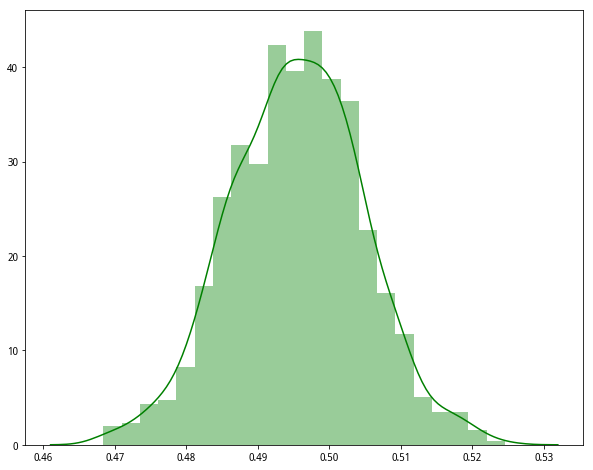

In [46]:
sns.distplot(sample_mean_calculator(u, 1000, 1000), color='green', kde=True)

在此模拟一枚不均匀的硬币，正面的概率为0.3，如果一次实验翻转100次那么应该有期望值0.3*100=30次出现正面。接下来利用python画出实验10000次的分布：

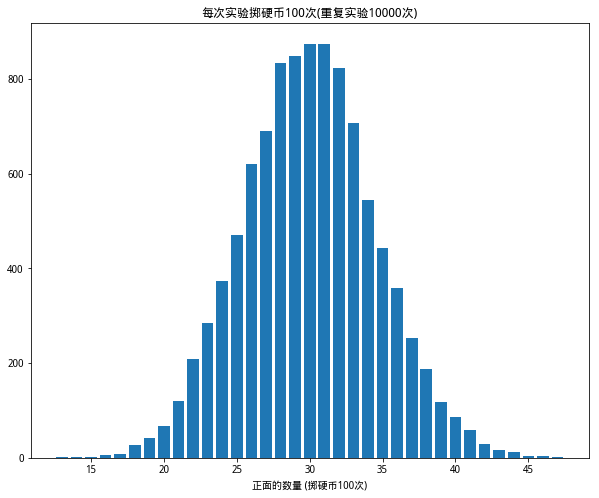

In [47]:
n = 10000
heads_count = [np.random.binomial(100, 0.3) for i in range (n)]
heads, heads_count = np.unique(heads_count, return_counts=True)
event_proba = heads_count/n

plt.bar(heads, heads_count)
plt.xlabel('正面的数量 (掷硬币100次)')
plt.title("每次实验掷硬币100次(重复实验10000次)")
plt.show()

从上图能清晰看出分布是集中在30的正态分布。